<a href="https://colab.research.google.com/github/rajiul123/dhaka_apartment_price_project/blob/main/dhaka_apartment_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv("bproperty_data.csv")
df2 = pd.read_csv("Dhaka_Apartment_Dataset.csv")

In [3]:
df1.shape, df2.shape

((4704, 11), (10580, 10))

**Inspecting and cleaning dataset-1**

In [4]:
df1.head(1)

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.3928,Uttara,Sector 10


In [6]:
# dropping Location and Sub-region columns and creating a new dataset
df3 = df1[["Price", "Type", "No. Beds", "No. Baths", "Area", "Region"]]
df3.head(1)

,Price,Type,No. Beds,No. Baths,Area,Region
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [11]:
# Now we need to rename our columns
df3.rename(columns = {
    "No. Beds": "Beds",
    "No. Baths": "Baths",
    "Area": "Size",
    "Region": "Location"
}, inplace=True)
df3.head(1)

<ipython-input-11-56beb82b7dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns = {


,Price,Type,Beds,Baths,Size,Location
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [12]:
# Rearranging columns
df4 = df3.iloc[:, [0, 1, 4, 2, 3, 5]]
df4.head(1)

,Price,Type,Size,Beds,Baths,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [14]:
#checking null values
df4.isnull().sum()

,0
Price,0
Type,0
Size,0
Beds,204
Baths,204
Location,0


In [15]:
#dropping null values
df4.dropna(inplace=True)
df4.isnull().sum()

<ipython-input-15-86a231906d1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


,0
Price,0
Type,0
Size,0
Beds,0
Baths,0
Location,0


In [16]:
#checking datatypes and othe infos
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 0 to 4703
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4500 non-null   int64  
 1   Type      4500 non-null   object 
 2   Size      4500 non-null   float64
 3   Beds      4500 non-null   float64
 4   Baths     4500 non-null   float64
 5   Location  4500 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 246.1+ KB


In [17]:
# Beds and Baths number cannot be float. So we are going to make the datatype integers
df4["Beds"] = df4["Beds"].astype(int)
df4["Baths"] = df4["Baths"].astype(int)

<ipython-input-17-ecef1e82471d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Beds"] = df4["Beds"].astype(int)
<ipython-input-17-ecef1e82471d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Baths"] = df4["Baths"].astype(int)


In [18]:
df4.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,int64
Baths,int64
Location,object


In [19]:
df4.head(1)

,Price,Type,Size,Beds,Baths,Location
0,7500000,Apartment,1300.0,3,3,Uttara


#Observations
* dataset-1 contains 11 column and 4704 entries
* some columns have same type of data such as Location, Region and Sub-region columns contain almost same type thing. All contain location. So we have dropped Location and Sub-region columns
* It seems we don't need Latitude and Longitude data for this problem. So we have dropped these columns also
* Beds and Baths columns contain 204 null values each. We cannot fill these null values with average because Beds and Baths number cannot contain float value. So We have dropped these values.

**Checking and cleaning DataFrame-2**

In [20]:
df2.head(1)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [21]:
# creating new dataframe by dropping unnecessary columns
df5 = df2[["price", "size_in_sqf", "number_of_bath", "number_of_bed", "location_area", "type_of_listing"]]
df5.head(1)

,price,size_in_sqf,number_of_bath,number_of_bed,location_area,type_of_listing
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [24]:
#rearranging columns
df6 = df5.iloc[:, [0, 5, 1, 3, 2, 4]]
df6.head(1)

,price,type_of_listing,size_in_sqf,number_of_bed,number_of_bath,location_area
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A


In [25]:
# renaming columns
df6.rename(columns={
    "price": "Price",
    "type_of_listing": "Type",
    "size_in_sqf": "Size",
    "number_of_bed": "Beds",
    "number_of_bath": "Baths",
    "location_area": "Location"
}, inplace=True)
df6.head(1)

,Price,Type,Size,Beds,Baths,Location
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A


In [26]:
#checking datatypes and othe infos
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10580 entries, 0 to 10579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     10580 non-null  float64
 1   Type      10580 non-null  object 
 2   Size      10580 non-null  float64
 3   Beds      10580 non-null  int64  
 4   Baths     10580 non-null  int64  
 5   Location  10580 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 496.1+ KB


In [27]:
df6["Price"] = df6["Price"].astype(int)

In [28]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,int64
Baths,int64
Location,object


# Observations
* We want to merge the datasets. So both the dataset must contain same number of columns and the name of columns must be same

**Merging dataframes**

In [31]:
df4.head(1)

,Price,Type,Size,Beds,Baths,Location
0,7500000,Apartment,1300.0,3,3,Uttara


In [32]:
df6.head(1)

,Price,Type,Size,Beds,Baths,Location
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A


In [33]:
df7 = pd.concat([df4, df6], axis=0)
df7.head(1)

,Price,Type,Size,Beds,Baths,Location
0,7500000,Apartment,1300.0,3,3,Uttara


In [34]:
df7.shape

(15080, 6)

In [36]:
df7.to_csv("cleaned_dhaka_apt_dataset.csv", index=False)

# Analysing New Dataset

In [37]:
df8 = df7.copy()
df8.head(2)

,Price,Type,Size,Beds,Baths,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur


In [38]:
#adding a new column with price per square feet entries
df8["Price_per_sqf"] = (df8.Price / df8.Size).astype(int)

In [40]:
df8.head(10)

,Price,Type,Size,Beds,Baths,Location,Price_per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,5769
1,7280000,Apartment,1456.0,4,4,Mirpur,5000
2,13000000,Apartment,1550.0,3,3,Khilgaon,8387
3,37000000,Apartment,2669.0,3,3,Banani,13862
4,3600000,Apartment,835.0,2,2,Banasree,4311
5,6800000,Apartment,1260.0,3,3,Mirpur,5396
6,6800000,Apartment,1260.0,3,3,Mirpur,5396
7,5500000,Apartment,750.0,2,2,Shantinagar,7333
8,6700000,Apartment,938.0,3,2,Rampura,7142
9,13500000,Apartment,1455.0,3,3,Tejgaon,9278


In [43]:
df8.Type.value_counts()

,count
Type,
Apartment,14871
Building,153
Duplex,55
Plot,1


#Observations
* Building, Duplex and Plot numbers are quite less than Apartment. This can affect algorithm as Building, Duplex and Plot price are not so much comparable to Apartment price. So we are going to drop these.

In [45]:
df9 = df8[df8.Type == "Apartment"]
df9.Type.value_counts()

,count
Type,
Apartment,14871


In [47]:
print(df9.Price_per_sqf.median())
print(df9.Price_per_sqf.mean())
print(df9.Price_per_sqf.std())
#print(df9.Price_per_sqf.mode())
print(df9.Price_per_sqf.max())
print(df9.Price_per_sqf.min())

5581.0
6280.627126622285
2639.1609520760458
30000
416


In [48]:
df10 = df9.sort_values("Price_per_sqf", ascending=False)

In [49]:
df10.head(10)

,Price,Type,Size,Beds,Baths,Location,Price_per_sqf
3660,81000000,Apartment,2700.0,4,4,Baridhara,30000
3318,120000000,Apartment,4200.0,3,3,Gulshan,28571
3980,170000000,Apartment,5950.0,3,4,Gulshan,28571
1452,150000000,Apartment,5345.0,4,4,Gulshan,28063
1333,140000000,Apartment,5127.0,4,4,Baridhara,27306
3206,60000000,Apartment,2240.0,4,4,Baridhara,26785
1218,135000000,Apartment,5100.0,5,6,Baridhara,26470
2533,96300000,Apartment,3851.0,4,5,Gulshan,25006
2534,96300000,Apartment,3851.0,4,5,Gulshan,25006
2657,96300000,Apartment,3851.0,4,5,Gulshan,25006


In [50]:
# checking price per sqf by location from highest to lowest
df10.groupby("Location").Price_per_sqf.mean().sort_values(ascending=False)

,Price_per_sqf
Location,
Banani DOHS,16804.761905
Gulshan,16234.144279
BananiDOHS,15932.500000
MohakhaliDOHS,14779.000000
Mohakhali DOHS,13914.888889
...,...
Demra,3820.000000
UttarKhan,3680.500000
Savar,3529.826923


In [51]:
len(df10.Location.unique())

80

In [52]:
# some area names are presented in different way. We need to follow same naming convention
df10.Location = df10.Location.str.replace(" ", "")

In [53]:
len(df10.Location.unique())

69

In [54]:
# checking price per sqf by location from highest to lowest
df10.groupby("Location").Price_per_sqf.mean().sort_values(ascending=False)

,Price_per_sqf
Location,
BananiDOHS,16728.913043
Gulshan,16234.144279
MohakhaliDOHS,14038.333333
Banani,13421.452555
Baridhara,12923.547945
...,...
Shyampur,3826.773723
Demra,3820.000000
Savar,3529.826923


In [60]:
#comparing highest valued locations
top5 = df10.groupby("Location").Price_per_sqf.agg(["mean", "max", "median", "min"]).sort_values(by="mean", ascending=False).head(5)

<Axes: xlabel='Location', ylabel='mean'>

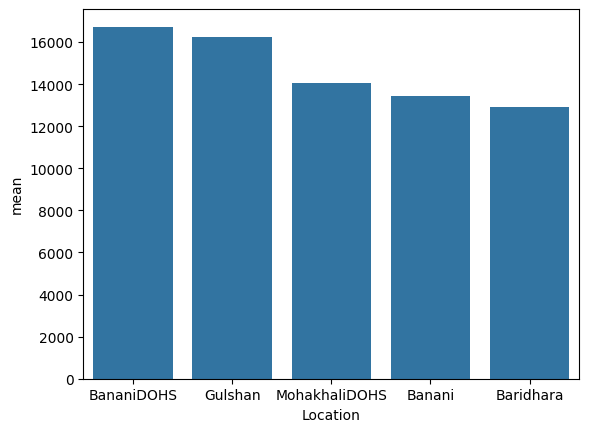

In [61]:
sns.barplot(data=top5, x="Location", y="mean")

<Axes: xlabel='Location', ylabel='mean'>

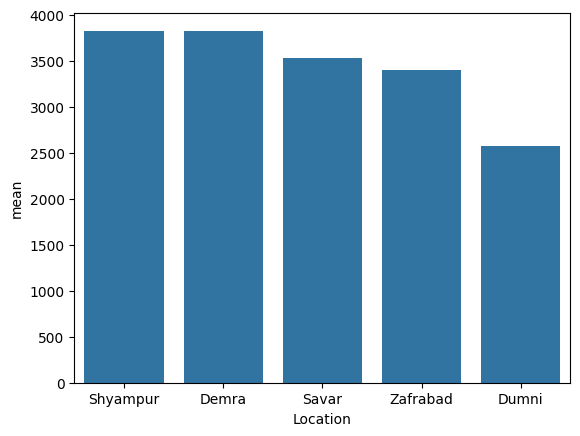

In [62]:
#comparing highest valued locations
lowest5 = df10.groupby("Location").Price_per_sqf.agg(["mean", "max", "median", "min"]).sort_values(by="mean", ascending=False).tail(5)
sns.barplot(data=lowest5, x="Location", y="mean")

In [63]:
#location count
location_count = df10.groupby("Location").Location.count()

In [64]:
location_count[location_count<=15]

,Location
Location,
Banglamotors,1
Dumni,10
Kakrail,3
Kuril,15
Nadda,7
Nikunja,15
NorthShahjahanpur,12
Paribagh,14
Shahbagh,2


In [65]:
len(location_count[location_count<=15])

12

In [66]:
location_less_than_15 = location_count[location_count<=15]

In [68]:
df10.Location = df10.Location.apply(lambda x: "Other" if x in location_less_than_15 else x)

In [69]:
len(df10.Location.unique())

58

In [70]:
df10.shape

(14871, 7)

In [74]:
#removing outliers
def remove_price_outlier(df):
  df_output = pd.DataFrame()
  for index, subdf in df.groupby("Location"):
    m = np.mean(subdf.Price_per_sqf)
    st = np.std(subdf.Price_per_sqf)
    reduce_df = subdf[(subdf.Price_per_sqf > (m-2*st)) & (subdf.Price_per_sqf <= (m+2*st))]
    df_output = pd.concat([df_output, reduce_df], ignore_index=True)
  return df_output

In [75]:
df11 = remove_price_outlier(df10)
df11.shape

(14190, 7)

In [77]:
df10.Price_per_sqf.describe()

,Price_per_sqf
count,14871.000000
mean,6280.627127
std,2639.160952
min,416.000000
25%,4615.000000
50%,5581.000000
75%,7087.000000
max,30000.000000


In [78]:
df11.Price_per_sqf.describe()

,Price_per_sqf
count,14190.000000
mean,6100.265469
std,2375.942122
min,1781.000000
25%,4591.000000
50%,5500.000000
75%,6934.000000
max,23809.000000


In [81]:
df11[df11.Price_per_sqf <= 1781]

,Price,Type,Size,Beds,Baths,Location,Price_per_sqf
11281,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
11282,2200000,Apartment,1235.0,3,3,Mohammadpur,1781


In [82]:
df11[df11.Location == "Mohammadpur"].Price_per_sqf.mean()

5005.524324324324

In [83]:
df11.head(1)

,Price,Type,Size,Beds,Baths,Location,Price_per_sqf
0,8761000,Apartment,1123.0,3,3,Adabor,7801


In [84]:
# Dropping Type and Price_per_sqf columns as these columns are no longer needed
df12 = df11.drop(["Type", "Price_per_sqf"], axis=1)

In [85]:
df12.head()

,Price,Size,Beds,Baths,Location
0,8761000,1123.0,3,3,Adabor
1,6200000,800.0,2,2,Adabor
2,6200000,800.0,2,2,Adabor
3,9419000,1217.0,3,2,Adabor
4,9419000,1217.0,3,2,Adabor


In [86]:
df12.to_csv("Cleand_apt_data.csv", index=False)

In [90]:
#converting categorical data to numerical data in Location column
location_dummies = pd.get_dummies(df12.Location, dtype=int)

In [91]:
location_dummies.head(1)

,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,Bangshal,Baridhara,BaridharaDOHS,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df13 = pd.concat([df12, location_dummies], axis=1)

In [93]:
df13.head(1)

,Price,Size,Beds,Baths,Location,Adabor,AftabNagar,Agargaon,Badda,Banani,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara
0,8761000,1123.0,3,3,Adabor,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df14 = df13.drop("Location", axis=1)
df14.head(1)

,Price,Size,Beds,Baths,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara
0,8761000,1123.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df14.dtypes

,0
Price,int64
Size,float64
Beds,int64
Baths,int64
Adabor,int64
...,...
Sutrapur,int64
Tejgaon,int64
Turag,int64
UttarKhan,int64


# Model Training

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [98]:
X = df14.drop("Price", axis=1)
y = df14.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11352, 61), (2838, 61), (11352,), (2838,))

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
model.score(X_test, y_test)

0.8600715392512612

In [103]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [105]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89233251, 0.86472911, 0.86913103, 0.87265504, 0.87864065])

In [106]:
def predict_price(size, bed, bath, location):
  location_index = np.where(X.columns==location)[0][0]
  result = np.zeros(len(X.columns))
  result[0] = size
  result[1] = bed
  result[2] = bath
  if location_index >= 0:
    result[location_index] = 1
  return model.predict([result])[0]

In [112]:
predict_price(1250, 3, 2, "Banasree")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


7133333.7684514625